# Q14 - Collinearity
_Ch 03 - Linear Regression  
Q14 (applied)_

<a id='index'></a>
### Index
- [Load packages](#Load-packages)
- [a) Simulate data](#a%29-Simulate-data)
- [b) Correlation between predictors](#b%29-Correlation-between-predictors)
- [c) y ~ x1 + x2](#c%29-y-~-x1-+-x2)
- [d) y ~ x1](#d%29-y-~-x1)
- [e) y ~ x2](#e%29-y-~-x2)
- [f) Comparing models](#f%29-Comparing-models)
- [g) Observation homecoming](#g%29-Observation-homecoming)
    - [Observations - y ~ x1 + x2](#obs-g1)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
sns.set_style(rc={'figure.facecolor':'w'})

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### a) Simulate data
Simulate data as per given code. y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [3]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100)
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})

Simulated linear model: &ensp; &rarr; &ensp; 
$ y = 2 + 2 x_1 + 0.3 x_2 + \epsilon $

Form of the linear model: &ensp; &rarr; &ensp; 
$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon $

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### b) Correlation between predictors
What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [4]:
# Correlation
print(np.corrcoef(x1, x2))

# alternatively
from scipy.stats import pearsonr
pearsonr(x1, x2)      # returns cor, p-value

[[1.         0.83905962]
 [0.83905962 1.        ]]


(0.8390596222844912, 1.1786892641780623e-27)

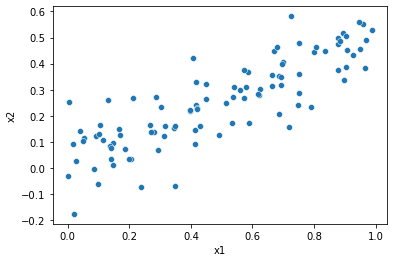

In [5]:
# Scatterplot
sns.scatterplot(x='x1', y='x2', data=df);

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### c) y ~ x1 + x2
Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are $\hat\beta_0$, $\hat\beta_1$, and $\hat\beta_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [6]:
# Least squares regression
reg1 = smf.ols('y ~ x1 + x2', data=df).fit()

print(f'rsq : {round(reg1.rsquared, 5)}, adj_rsq : {round(reg1.rsquared_adj, 5)}')
reg1.summary().tables[1]

rsq : 0.26051, adj_rsq : 0.24526


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.1893,0.199,11.021,0.000,1.795,2.584
x1,0.7046,0.637,1.107,0.271,-0.559,1.968
x2,2.5024,1.140,2.194,0.031,0.239,4.766


$\hat\beta_0$ = 2.189 is close to the true $\beta_0$ = 2 and has p-value < 0.05.<br>
$\hat\beta_1$ = 0.7046 is neither close to the true $\beta_1$ = 2, nor is it significant at $\alpha$ of 5% with a p-value = 0.271. $H_0 : \beta_1 = 0$ can't be rejected.<br>
$\hat\beta_2$ = 2.5024 is also quite different from the true $\beta_2$ = 0.3. Its p-value < 0.05 and therefore we have statistical evidence to reject the $H_0 : \beta_2 = 0$.<br>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### d) y ~ x1
Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [7]:
reg2 = smf.ols('y ~ x1', data=df).fit()
print(f'rsq : {round(reg2.rsquared, 5)}, adj_rsq : {round(reg2.rsquared_adj, 5)}')
reg2.summary().tables[1]

rsq : 0.2238, adj_rsq : 0.21588


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2486,0.201,11.209,0.000,1.850,2.647
x1,1.8770,0.353,5.316,0.000,1.176,2.578


This time we can reject the $H_0 : \beta_1 = 0$.<br>
The estimated coefficient for $x_1$ (1.877) is also closer to true $\beta_1$ (2).<br>
$\hat\beta_0$ = 2.2486 has strayed a bit farther from true $\beta_0$ = 2 but its statistically significant.<br>
The $R^2$ and $Adj R^2$ values have decreased from the previous model.

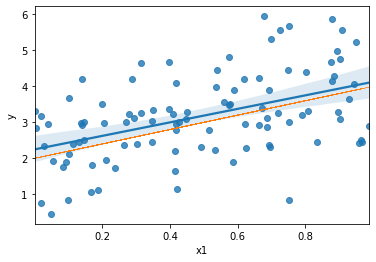

In [8]:
sns.regplot(x='x1', y='y', data=df)
plt.plot(x1, 2+2*x1, lw=0.4);

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### e) y ~ x2
Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [9]:
reg3 = smf.ols('y ~ x2', data=df).fit()
print(f'rsq : {round(reg3.rsquared, 5)}, adj_rsq : {round(reg3.rsquared_adj, 5)}')
reg3.summary().tables[1]

rsq : 0.25117, adj_rsq : 0.24353


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2655,0.187,12.145,0.000,1.895,2.636
x2,3.5613,0.621,5.733,0.000,2.329,4.794


The $H_0 : \beta_1 = 0$ is rejected as p-value is less than $\alpha$ = 0.05.<br>
The estimated coefficient for $x_2$ (3.5613) is very different than the true $\beta_1$ (0.3).<br>
$\hat\beta_0$ = 2.2655 is close to the true $\beta_0$ = 2 and is statistically significant as well.<br>
The $R^2$ is marginally less than the model containing both x1 and x but $Adj R^2$ value is similar (0.24526 v 0.24353).

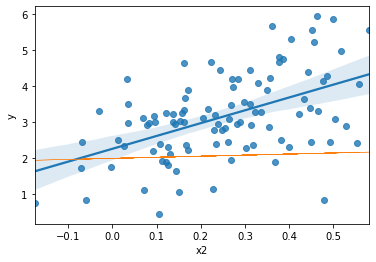

In [10]:
sns.regplot(x='x2', y='y', data=df)
plt.plot(x2, 2+0.3*x2, lw=0.4);

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### f) Comparing models
Do the results obtained in (c)–(e) contradict each other? Explain your answer.

<b>Answer:</b><br>
The results of the 3 models may appear contradictory superficially (both predictors being significant when modeled one-on-one with y but only 1 being significant when taken together) but would make sense if you take into account the relationship between x1 and x2.<br>

The correlation between x1 and x2 is pretty strong at 0.8391, which implies that they move in sync to a large extent. They are considered collinear and the seeming contradiction in the models is driven by the multcollinearity phenomenon.

In the model that contains both x1 and x2, coefficient for x1 was deemed insignificant. That only meant that including x1 in a model that already has x2 did not improve the predictability of y to an extent that could be considered more than happenstance (at 5% alpha). So, to predict the direction of y, using the movement of x2 is enough. Using movement of x1, which anyways moves in sync with x2, will not provide much additional benefit.

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### Defined Functions

##### Function to plot Externally Studentized Residuals vs Fitted Values

In [11]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Function to plot Externally Studentized Residuals vs Fitted Values an Leverage
def esr_plots(fitted_model, mark_cd=False, plot_dim=(15,4)):
    y_pred = fitted_model.fittedvalues
    resids = fitted_model.resid
    smoothed = lowess(resids, y_pred)
    lev = pd.Series(fitted_model.get_influence().hat_matrix_diag, index=y_pred.index)
    ext_std_resids = pd.Series(fitted_model.get_influence().resid_studentized_external,
                               index=y_pred.index)
    cooks_d = pd.Series(fitted_model.get_influence().cooks_distance[0], index=y_pred.index)
    
    # Plot
    f, axs = plt.subplots(1, 2, figsize=plot_dim)
    
    # Externally studentized Residuals vs Fitted Values
    axs[0].scatter(x=y_pred, y=ext_std_resids, alpha=1, s=15, facecolor='none', 
                     edgecolor='steelblue')
    axs[0].axhline(y=0, color='k', ls='--', lw=0.3)
    axs[0].plot(smoothed[:,0], smoothed[:,1], color = 'r', lw=0.3)
    for i in [-3, 3]:
        axs[0].axhline(y=i, color='r', ls='--', lw=0.5)
    xmin, xmax = axs[0].get_xlim()
    axs[0].set_xlim(xmin-((xmax-xmin)/10), xmax+(xmax-xmin)/10)
    for i in ext_std_resids.index[abs(ext_std_resids) > 3]:
        axs[0].annotate(i, xy=(y_pred[i], ext_std_resids[i]), fontsize=8)
    axs[0].set_title("Externally Studentized Residual v Fitted Values")
    axs[0].set_xlabel('Fitted Values')
    axs[0].set_ylabel('Externally Studentized Residuals')

    
    # Externally studentized Residuals vs Leverage
    axs[1].scatter(x=lev, y=ext_std_resids, alpha=1, s=15, facecolor='none', 
                     edgecolor='steelblue')
    axs[1].axvline(x=3*(fitted_model.df_model+1)/(fitted_model.df_resid+fitted_model.df_model+1),
                     color='grey', ls='--', lw=0.5)   # 3p/n
    sns.regplot(ax=axs[1], x=lev, y=ext_std_resids, scatter=False, ci=False, lowess=True,
                line_kws={'color':'r', 'lw':0.5})
    axs[1].set_title('Externally Studentized Residuals v Leverage')
    axs[1].set_ylabel('Externally Studentized Residuals')
    axs[1].set_xlabel('Leverage')
    xmin, xmax = axs[1].get_xlim()
    axs[1].set_xlim(xmin-((xmax-xmin)/10), xmax+(xmax-xmin)/10)
    if mark_cd:
        top_cd = cooks_d.sort_values(ascending=False)[:3]
        for i in top_cd.index:
            axs[1].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9)
        notable_cd = cooks_d[cooks_d > 0.5]
        for i in notable_cd.index:
            if cooks_d[i] > 1:
                axs[1].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9, color='r')
            else:
                axs[1].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9, color='blue')
    else:
        top_lev = lev.sort_values(ascending=False)[:3]
        for i in top_lev.index:
            axs[1].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9)
        notable_lev = lev[lev > 3*(fitted_model.df_model+1)/fitted_model.resid.shape[0]]
        for i in notable_lev.index:
            if cooks_d[i] > 1:
                axs[1].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9, color='r')
            else:
                axs[1].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9)

##### Function to create influence plots

In [12]:
# Function to create influence plots
def influence_diagnostic_plots(fitted_model, plot_dim=(15,4), mark_cd=True):
    y_pred = fitted_model.fittedvalues
    lev = pd.Series(fitted_model.get_influence().hat_matrix_diag, index=y_pred.index)
    ext_std_resids = pd.Series(fitted_model.get_influence().resid_studentized_external,
                               index=y_pred.index)
    
    cooks_d = pd.Series(fitted_model.get_influence().cooks_distance[0], index=y_pred.index)
    
    cooks_th = 4/fitted_model.df_resid
    gt_cooks_th = cooks_d > cooks_th
    lev_th = 3*(fitted_model.df_model+1) / (fitted_model.df_resid+fitted_model.df_model+1)

    f, axs = plt.subplots(1,2, figsize=plot_dim)
    sns.scatterplot(x=lev, y=ext_std_resids, hue=gt_cooks_th, ax=axs[0],
                    palette=['steelblue','orange'], legend=False)
        
    for i in ext_std_resids.index[np.argsort(np.abs(ext_std_resids))[-3:]]:
        axs[0].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=8)
        
    axs[0].set_title("Externally Studentized Residual v Leverage")
    axs[0].set_xlabel('Leverage')
    axs[0].set_ylabel('Externally Studentized Residuals')

    
    # Cook's distance v Leverage
    sns.scatterplot(x=lev, y=cooks_d, hue=gt_cooks_th, ax=axs[1],
                    palette=['steelblue','orange'], legend=False)
    plt.axhline(y = cooks_th, color='grey', ls='--', lw=0.5)
    plt.axvline(x = lev_th, color='grey', ls='--', lw=0.5)
    marked = [i for i in y_pred.index if (lev[i] >= lev_th) and (cooks_d[i] >= cooks_th)]
    for i in marked:
        plt.annotate(i, xy=(lev[i], cooks_d[i]), fontsize=9, color='r')

    if mark_cd:
        top_cd = cooks_d.sort_values(ascending=False)[:3]
        for i in top_cd.index:
            axs[1].annotate(i, xy=(lev[i],  cooks_d[i]), fontsize=9)
        notable_cd = cooks_d[cooks_d > 0.5]
        for i in notable_cd.index:
            if cooks_d[i] > 1:
                axs[1].annotate(i, xy=(lev[i], cooks_d[i]), fontsize=9, color='pink')
            else:
                axs[1].annotate(i, xy=(lev[i], cooks_d[i]), fontsize=9, color='blue')

    axs[1].set_title("Cook's Distance v Leverage")
    axs[1].set_xlabel('Leverage')
    axs[1].set_ylabel("Cook's Distance")
    plt.figtext(0.32, -0.05, "Note: Orange markers are observations with cook's distance > 4/(n-k-1)", 
                fontsize=11)

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### g) Observation homecoming
Now suppose we obtain one additional observation, which was unfortunately mismeasured. (y=6, x1=0.1, x2 = 0.8)<br>
Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [13]:
df.tail(2)

,y,x1,x2
98,2.840827,0.002870,0.254268
99,4.204311,0.617145,0.283709


#### Adding new data

In [14]:
# Appending new data
y = np.append(y, 6)
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)

# Appending to df
sample = {'y':6, 'x1':0.1, 'x2':0.8}
df = df.append(sample, ignore_index=True)
df.tail(2)

,y,x1,x2
99,4.204311,0.617145,0.283709
100,6.000000,0.100000,0.800000


 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Bivariate analysis

(0.7488392235065433, 2.183056098580828e-19)


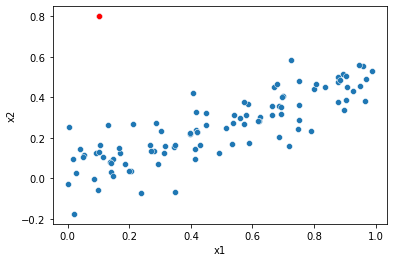

In [15]:
print(pearsonr(x1, x2))

sns.scatterplot(x='x1', y='x2', data=df)
sns.scatterplot(x=np.array([0.1]), y=np.array([0.8]), color='r');

<div class="alert alert-block alert-info">
We can see that the newly added observation has a very unusual combination of x1 and x2.<br>
The correlation between x1 and x2 has reduced significantly from 0.8391 to 0.7489.
</div>

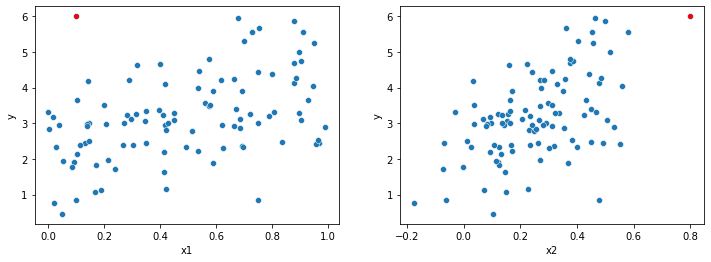

In [16]:
f, axs = plt.subplots(1,2, figsize=(12, 4))
sns.scatterplot(x='x1', y='y', data=df, ax=axs[0])
axs[0].scatter(0.1, 6, color='r', s=15)

sns.scatterplot(x='x2', y='y', data=df, ax=axs[1])
plt.scatter(0.8, 6, color='r', s=15);

In [17]:
# Top 3 y values
y[(-y).argsort()[:3]]

array([6.        , 5.94594997, 5.86069181])

</a><div class="alert alert-block alert-info">
The new observation is within the old range of x1 and marginally beyond the largest y value.<br>
But the new x2 value is farther away from the old x2 range to a moderate degree.
</div>

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### New models

##### y ~ x1 + x2

In [18]:
# Old model
print(f'rsq : {round(reg1.rsquared, 5)}, adj_rsq : {round(reg1.rsquared_adj, 5)}')
reg1.summary().tables[1]

rsq : 0.26051, adj_rsq : 0.24526


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.1893,0.199,11.021,0.000,1.795,2.584
x1,0.7046,0.637,1.107,0.271,-0.559,1.968
x2,2.5024,1.140,2.194,0.031,0.239,4.766


In [19]:
# New model
reg4 = smf.ols('y ~ x1 + x2', data=df).fit()
print(f'rsq : {round(reg4.rsquared, 5)}, adj_rsq : {round(reg4.rsquared_adj, 5)}')
reg4.summary().tables[1]

rsq : 0.28902, adj_rsq : 0.27451


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.1996,0.199,11.041,0.000,1.804,2.595
x1,0.2200,0.520,0.423,0.673,-0.812,1.252
x2,3.4392,0.892,3.857,0.000,1.670,5.209


<a id='obs-g1'></a>
<div class="alert alert-block alert-info">
    <h6>Observations</h6><br>
    - $\beta_{x1}$ is still insignificant but by an even larger p-value now.<br>
    - The coefficient for x2 is quite different from the true model.<br>
    - $R^2$ and $Adj R^2$ values have gone up slightly.<br><br>
    <b>Residual Analysis</b><br>
    &ensp; <b>Outliers</b><br>
    &ensp; - There is an observation that can be deemed an outlier as its externally studentized residual > 3, but it is not the new observation (obs 101). It is observation 79 (78+1), which is an outlier for both old and new models.<br>
    &ensp; - The new observation has a highly unusual combination of predictors, but its y value isn't anomolous which seems to have saved it from becoming an outlier.<br>
    &ensp; <b>High leverage</b><br>
    &ensp; - Leverage, denoted by $h_{ii}$, is a relative measure of unusualness of x values. $h_{ii}$ values change on change in the x values of a dataset.<br>
    &ensp; - An observation with $h_{ii}$ > 3p/n can be considered a high leverage observation.<br>
    &ensp; - In the old model, there were 2 points with high leverage. But after addition of obs 101, the $h_{ii}$ values for all the observations changed. As per the new $h_{ii}$ values, only obs 101, had a $h_{ii}$ value > 3p/n. And we can see that its value far outstrips the other observations.<br>
    &ensp; <b>Influential data point</b><br>
    &ensp; A data point is influential if it unduly influences any part of regression analysis such as:<br>
    &ensp; a) the predicted responses<br>
    &ensp; b) the estimated slope coefficients<br>
    &ensp; c) the hypothesis results<br>
    &ensp; obs 101 can definitely be considered influential as it checks 2 of the above 3 boxes.<br> 
    &ensp; - It's addition incresed the $R^2$ value from 0.261 to 0.289<br>
    &ensp; - The slope coefficient for $\beta_{x2}$ increased from 2.5 to 3.44<br>
    &ensp; - And although, the p-value for $\beta_{x1}$ increased from 0.271 to 0.673, it did not bring any change in it's significance. So, the 3rd condition is not quite satisfied.<br>
    &ensp; <b>Highly influential observations</b><br>
    &ensp; - An observation with Cook's Distance > 1, is considered highly influential, and one with CD > 0.5 potentially highly influential. But there is a more conservative threshold for smaller datasets, &ensp; $\frac{4}{N - k - 1}$ &ensp; which is used to highlight potentially influential observations.<br>
    &ensp; - We can see in the residual analysis of the new model (Cook's Distance v Leverage plot), that obs 101 has a large leverage and cook's distance value. It's introduction in the dataset has influenced the model greatly.<br> 
</div>

[go to toc](#index)

###### Residual Analysis

###### Old model

In [20]:
reg4.get_influence().hat_matrix_diag[reg4.get_influence().hat_matrix_diag > 3*3/101]

array([0.40916109])

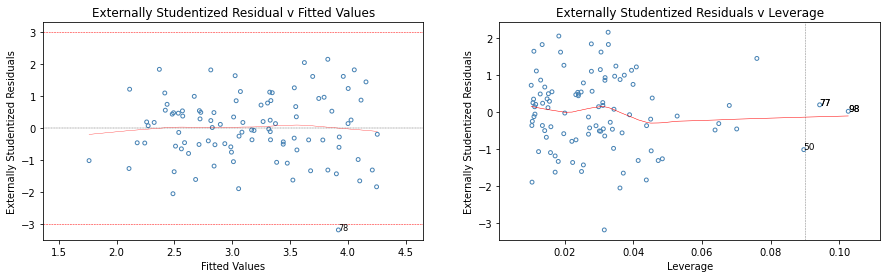

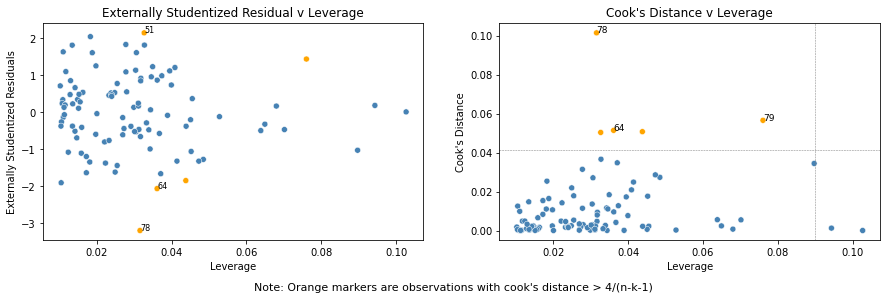

In [21]:
# Old model
esr_plots(reg1)
influence_diagnostic_plots(reg1)

###### New model

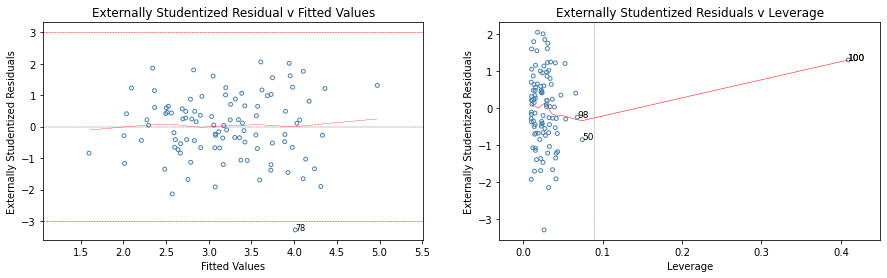

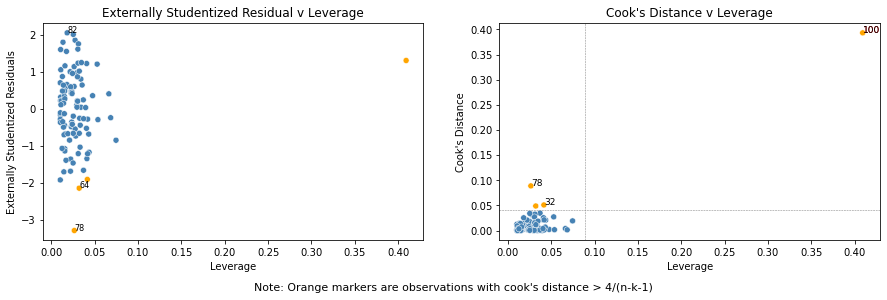

In [22]:
# New model
esr_plots(reg4)
influence_diagnostic_plots(reg4)

[go to toc](#index)

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### y ~ x1

In [23]:
# Old model
print(f'rsq : {round(reg2.rsquared, 5)}, adj_rsq : {round(reg2.rsquared_adj, 5)}')
reg2.summary().tables[1]

rsq : 0.2238, adj_rsq : 0.21588


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2486,0.201,11.209,0.000,1.850,2.647
x1,1.8770,0.353,5.316,0.000,1.176,2.578


In [24]:
# New model
reg5 = smf.ols('y ~ x1', data=df).fit()
print(f'rsq : {round(reg5.rsquared, 5)}, adj_rsq : {round(reg5.rsquared_adj, 5)}')
reg5.summary().tables[1]

rsq : 0.18109, adj_rsq : 0.17282


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3583,0.208,11.331,0.000,1.945,2.771
x1,1.7225,0.368,4.679,0.000,0.992,2.453


<a id='obs-g2'></a>
<div class="alert alert-block alert-info">
    <h6>Observations</h6><br>
    - $\beta_{x1}$ has decreased a little but is significant as before. Intercept's coefficient has increase a little.<br>
    - $R^2$ value has gone done from 0.224 to 0.181.<br>
    - There weren't any outliers before but obs 101 has become an outlier after it is introduced.<br>
    - The leverage plots for old and new models look similar. It is not surprising as the value of x1 for obs 101 was within the existing x1 range.<br>
    - Obs 101 has the highest Cook's distance value = 0.140652. Cook's distance values are calculated using the residual value and leverage.<br>
    $$D_i=\dfrac{(y_i-\hat{y}_i)^2}{p \times MSE}\left( \dfrac{h_{ii}}{(1-h_{ii})^2}\right)$$
    &ensp; Obs 101's residual is the highest, which explains why it's Cook's Distance is the highest despite its $h_{ii}$ being 61st highest value.<br>
    - Given that the x1 value for obs 101 was within the existing x1 range and it's x2 value was beyond the existing x2 range, it seems that obs 101 derives its abnormal influence from its x2 value.<br>
</div>

###### Residual analysis

###### Old model

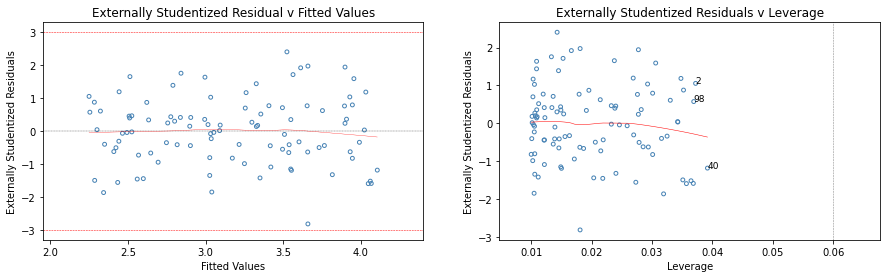

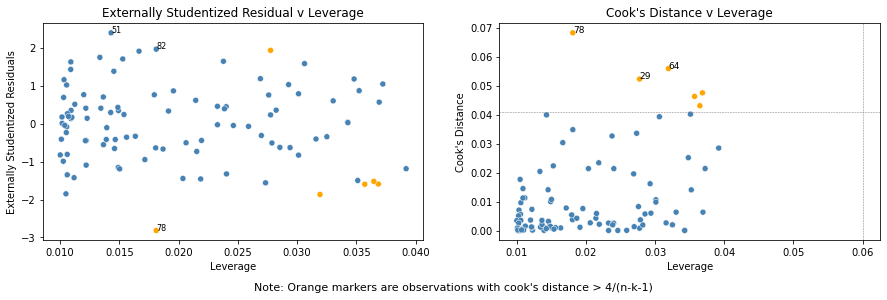

In [25]:
# Old model
esr_plots(reg2)
influence_diagnostic_plots(reg2)

###### New model

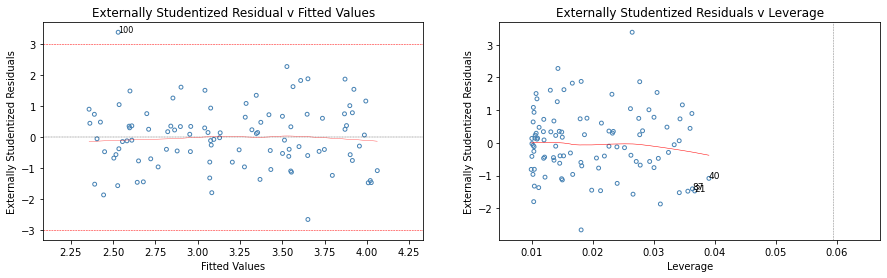

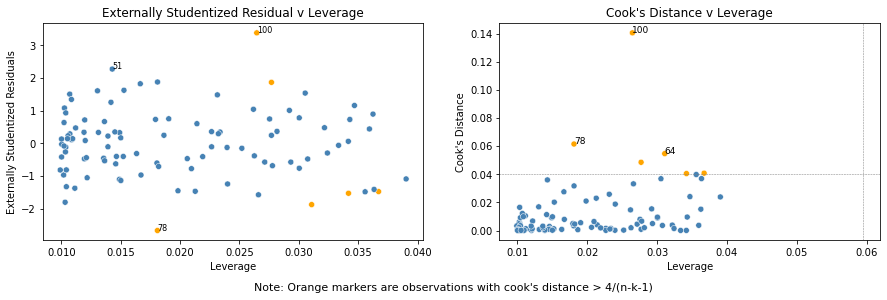

In [26]:
# New model
esr_plots(reg5)
influence_diagnostic_plots(reg5)

In [27]:
# Highest Cook's Distance
max(reg5.get_influence().cooks_distance[0])

0.14065241848755164

In [28]:
# Highest k Cook's Distance
reg5.get_influence().cooks_distance[0][np.argsort(reg5.get_influence().cooks_distance[0])[-2:]]

array([0.06155448, 0.14065242])

In [29]:
# Observation with highest Cook's Distance
np.argsort(reg5.get_influence().cooks_distance[0])[-2:]

array([ 78, 100], dtype=int64)

In [30]:
reg5.get_influence().cooks_distance[0][78]

0.061554482469857556

In [31]:
# Residuals ranked (ascending)
np.argsort(reg5.resid)

0       78
1       64
2       31
3       30
4       50
      ... 
96      79
97      29
98      82
99      51
100    100
Length: 101, dtype: int64

In [32]:
# Rank of 101st (new) observation
np.argsort(reg5.get_influence().hat_matrix_diag)[100]

40

[go to toc](#index)

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### y ~ x2

In [33]:
# Old model
print(f'rsq : {round(reg3.rsquared, 5)}, adj_rsq : {round(reg3.rsquared_adj, 5)}')
reg3.summary().tables[1]

rsq : 0.25117, adj_rsq : 0.24353


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2655,0.187,12.145,0.000,1.895,2.636
x2,3.5613,0.621,5.733,0.000,2.329,4.794


In [34]:
# New model
reg6 = smf.ols('y ~ x2', data=df).fit()
print(f'rsq : {round(reg6.rsquared, 5)}, adj_rsq : {round(reg6.rsquared_adj, 5)}')
reg6.summary().tables[1]

rsq : 0.28772, adj_rsq : 0.28053


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2331,0.182,12.271,0.000,1.872,2.594
x2,3.7216,0.589,6.324,0.000,2.554,4.889


<a id='obs-g2'></a>
<div class="alert alert-block alert-info">
    <h6>Observations</h6><br>
    - $\beta_{x2}$ has increased a little from before. Intercept's coefficient has decreased marginally.<br>
    - $R^2$ value has gone up from 0.251 to 0.288.<br>
    - Obs 79 is the outlier in both old and new models.<br>
    - Obs 51 had the higest leverage before obs 101 was added. In the second model, both leverages cross the threshold of $h_{ii}$ > 3p/n and obs 101's leverage surpasses 51's by a considerable margin.<br>
    &nbsp; This seems consistent with the fact that the newly added x2 value fell quite outside the existing range, as we saw above.<br>
    - When regressing y on x2 (instead of x1), obs 101 does not have the highest Cook's distance value ($D_i$).<br>
    &nbsp; Obs 101's $h_{ii}$ value is the highest and its residual is the 19th highest, but that together has not been able to raise its cook's distance value to the top.<br>
    &nbsp; Despite obs 101's $h_{ii}$ value seemingly fast outstripping the other values, its $D_i$ value is less than many other observations. This leads me to believe that the residuals carry far more weight than $h_{ii}$ in the calculation of $D_i$.
</div>

###### Residual analysis

###### Old model

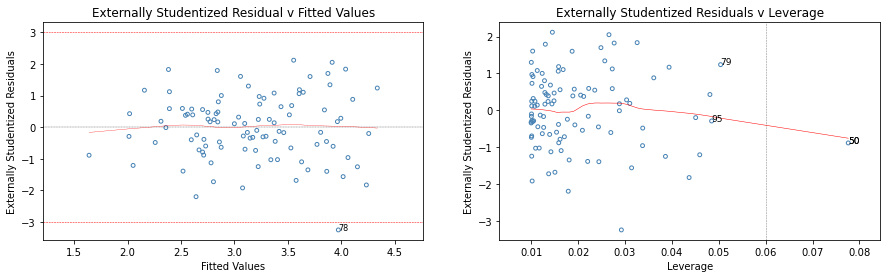

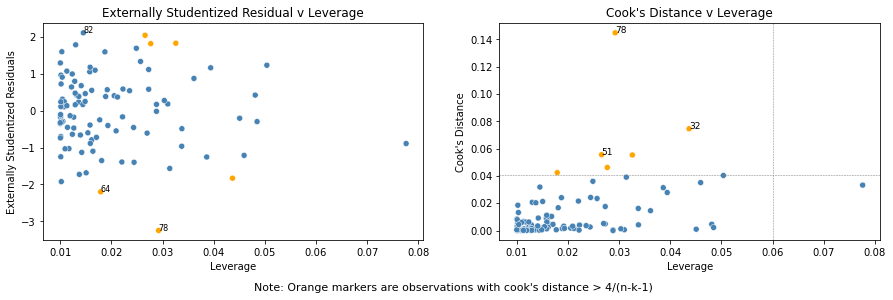

In [35]:
# Old model
esr_plots(reg3)
influence_diagnostic_plots(reg3)

In [36]:
# Observation with highest Cooks Distance
print(max(reg3.get_influence().cooks_distance[0]))
np.where(reg3.get_influence().cooks_distance[0] == max(reg3.get_influence().cooks_distance[0]))

0.1448228582607567


(array([78], dtype=int64),)

###### New model

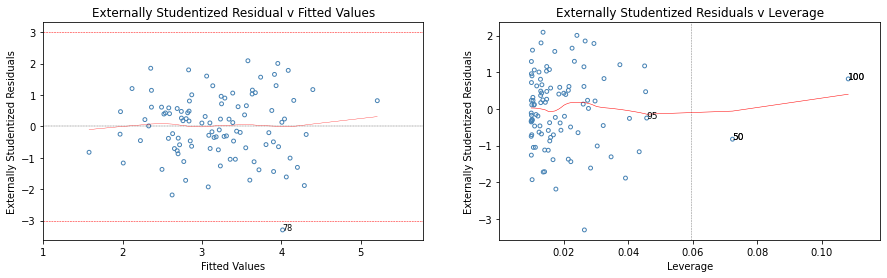

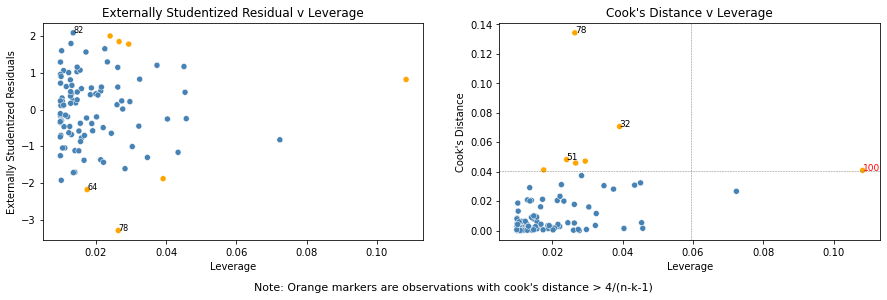

In [37]:
# New model
esr_plots(reg6)
influence_diagnostic_plots(reg6)

In [38]:
# Highest absolute Ext Stu Resid
np.abs(pd.Series(reg6.get_influence().resid_studentized_external, 
                 index=reg6.resid.index)).sort_values()

14    0.013636
36    0.106712
43    0.110888
45    0.112231
93    0.121257
        ...   
31    1.929048
51    2.005698
82    2.091131
64    2.185551
78    3.299653
Length: 101, dtype: float64

In [39]:
# Highest k Cook's Distance
reg6.get_influence().cooks_distance[0][np.argsort(reg6.get_influence().cooks_distance[0])[-2:]]

array([0.0706161 , 0.13424547])

In [40]:
# Observation with highest Cook's Distance
np.argsort(reg6.get_influence().cooks_distance[0])[-3:]

array([51, 32, 78], dtype=int64)

In [41]:
# Residuals ranked in ascending order
reg6.resid.argsort()

0      78
1      64
2      31
3      32
4      75
       ..
96     29
97     35
98     18
99     51
100    82
Length: 101, dtype: int64

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### References

https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions  
https://botlnec.github.io/islp/sols/chapter3/exercise11/

[go to toc](#index)

<b> &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;-------------------------------------------- &ensp; <i>That's All Folks!</i> &ensp; --------------------------------------------</b>